
Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

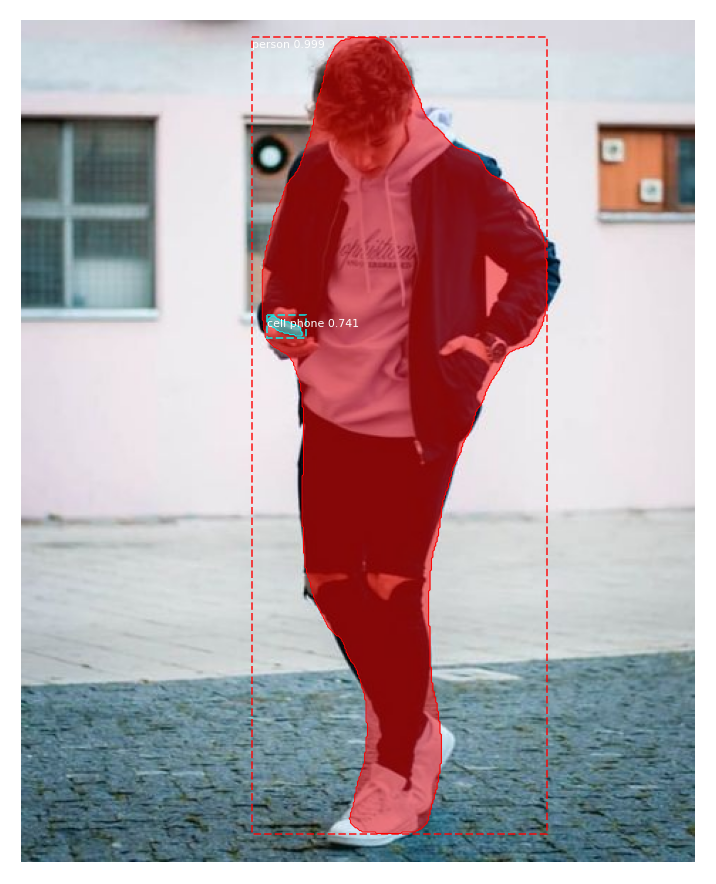

In [8]:
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import cv2
import colorsys
import argparse
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

class SimpleConfig(Config):
    NAME = "coco_inference"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 81

config = SimpleConfig()
config.display()
model = modellib.MaskRCNN(mode="inference", config=config, model_dir=os.getcwd())
model.load_weights("weight/mask_rcnn_coco.h5", by_name=True)
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
                'bus', 'train', 'truck', 'boat', 'traffic light',
                'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
                'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
                'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
                'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
                'kite', 'baseball bat', 'baseball glove', 'skateboard',
                'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
                'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
                'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
                'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
                'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
                'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
                'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
                'teddy bear', 'hair drier', 'toothbrush']
image = cv2.imread("Source/boy.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


print("[INFO] making predictions with Mask R-CNN...")
result = model.detect([image], verbose=1)
r1 = result[0]
visualize.display_instances(image, r1['rois'], r1['masks'],   r1['class_ids'], class_names, r1['scores'])

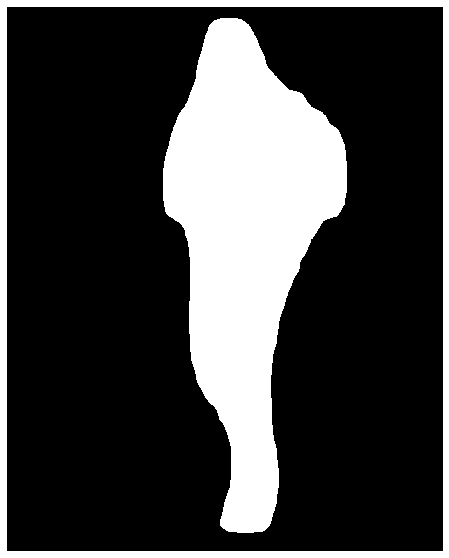

person
cell phone
2


In [9]:
plt.figure(figsize=(10, 10))
def make_segmentation_mask(image, mask):
    img = image.copy()
    img[:,:,0] *= mask
    img[:,:,1] *= mask
    img[:,:,2] *= mask
    plt.axis('off')
    fig=plt.imshow(mask,cmap='gray',interpolation='nearest')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.savefig('myfig.jpg',bbox_inches='tight',pad_inches = 0, dpi=96)
    plt.show()
mask = r1['masks'][:,:,0]
make_segmentation_mask(image, mask)
for i in r1['class_ids']:
    print(class_names[i])

print(r1['rois'].shape[0])